In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
dados = pd.read_csv('./CSV/paper_allDB.csv')

In [4]:
dados

,SMI,lambda1 (sTDA nm),F1 (sTDA),lamda1 (TD-DFT nm),F1 (TD-DFT),lambda_max (Exp nm),extinction (Lmol-1cm-1),solvent
0,OC[C@@H]([C@H]1OC(=O)C(=C1O)O)O,NaN,NaN,NaN,NaN,280.000000,NaN,NaN
1,Oc1cc(O)c2c(c1)O[C@@H]([C@@H](C2)OC(=O)c1cc(O)...,263.5,0.013443,NaN,NaN,280.000000,NaN,NaN
2,Brc1[nH]c2c(n1)c(Br)c(c(c2Br)Br)Br,264.0,0.061442,NaN,NaN,940.000000,NaN,NaN
3,Clc1ccc(c(c1)Cl)OCCn1cncc1,245.2,0.013209,NaN,NaN,254.000000,NaN,NaN
4,COC(=O)C(CC(=O)O)(CC(=O)O)O,NaN,NaN,NaN,NaN,1666.666667,NaN,NaN
...,...,...,...,...,...,...,...,...
8483,[O-]N=O,NaN,NaN,NaN,NaN,814.000000,NaN,NaN
8484,O=C(Nc1cccc(c1)C(=O)Nc1cc(ccc1C)C(=O)Nc1ccc(c2...,NaN,NaN,NaN,NaN,500.000000,NaN,NaN
8485,FC1N(C)C=CC=C1C1=C2C=CC(=N2)C(=c2ccc(=C(C3=NC(...,NaN,NaN,NaN,NaN,648.000000,283000.0,NaN
8486,OS(=O)(=O)O.C=C[C@H]1CN2CCC1C[C@H]2[C@@H](c1cc...,NaN,NaN,NaN,NaN,452.000000,NaN,NaN


In [5]:
# renomeando as colunas
columns = ['SMILES', 'lambda_sTDA', 'f_sTDA', 'lambda_TD_DFT', 'f_TD_DFT', 'lambda_exp', 'extinction_exp', 'solvent']
dados.columns = columns

In [6]:
# tipos de dados
dados.dtypes

SMILES             object
lambda_sTDA       float64
f_sTDA            float64
lambda_TD_DFT     float64
f_TD_DFT          float64
lambda_exp        float64
extinction_exp    float64
solvent            object
dtype: object

In [7]:
# verificando a quantidade de dados faltantes
dados.isnull().sum()

SMILES               0
lambda_sTDA       2351
f_sTDA            2351
lambda_TD_DFT     8303
f_TD_DFT          8303
lambda_exp         737
extinction_exp    7109
solvent           6235
dtype: int64

In [8]:
dados['SMILES'].nunique()

8409

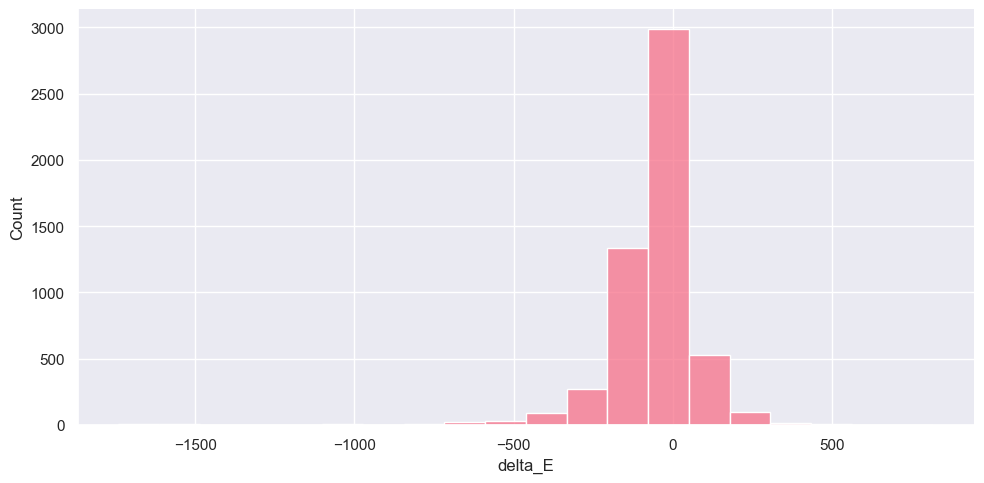

In [9]:
# distribuição do erro dos lambdas
dados['delta_E'] = dados['lambda_sTDA'] - dados['lambda_exp']
sns.set_theme(style="darkgrid", palette="husl", rc={"figure.figsize":(13, 6)})
sns.displot(dados, x='delta_E', bins=20, height=5, aspect=2)

[Text(0.5, 0, 'erro absoluto (ΔE)')]

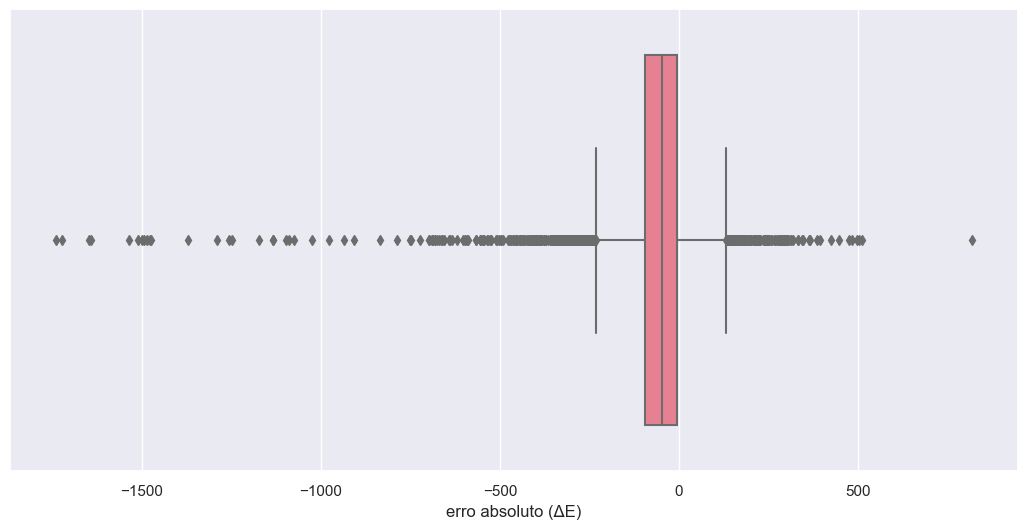

In [36]:
sns.boxplot(x='delta_E', data=dados).set(xlabel='erro absoluto (ΔE)')

In [10]:
# parâmetros estatísticos de cada variável
stats = dados.describe()
stats

,lambda_sTDA,f_sTDA,lambda_TD_DFT,f_TD_DFT,lambda_exp,extinction_exp,delta_E
count,6137.000000,6137.000000,185.000000,185.000000,7751.000000,1379.000000,5406.000000
mean,326.551035,0.446744,348.229201,1.145946,411.597914,45700.377415,-61.526712
std,71.379886,0.596351,49.753572,0.477434,180.364557,57275.132673,146.224104
min,194.400000,0.000000,274.495645,0.000197,0.000000,1026.000000,-1740.700000
25%,282.100000,0.016220,311.510246,0.773956,309.850000,17835.000000,-95.975000
50%,314.900000,0.179843,335.482298,1.045894,388.000000,31524.000000,-46.000000
75%,357.200000,0.642813,377.172648,1.508236,481.000000,48988.940970,-5.000000
max,1826.000000,3.693697,497.449017,2.764309,2000.000000,626300.000000,818.100000


[Text(0.5, 0, 'coeficiente de extinção molar'), Text(0, 0.5, 'quantidade')]

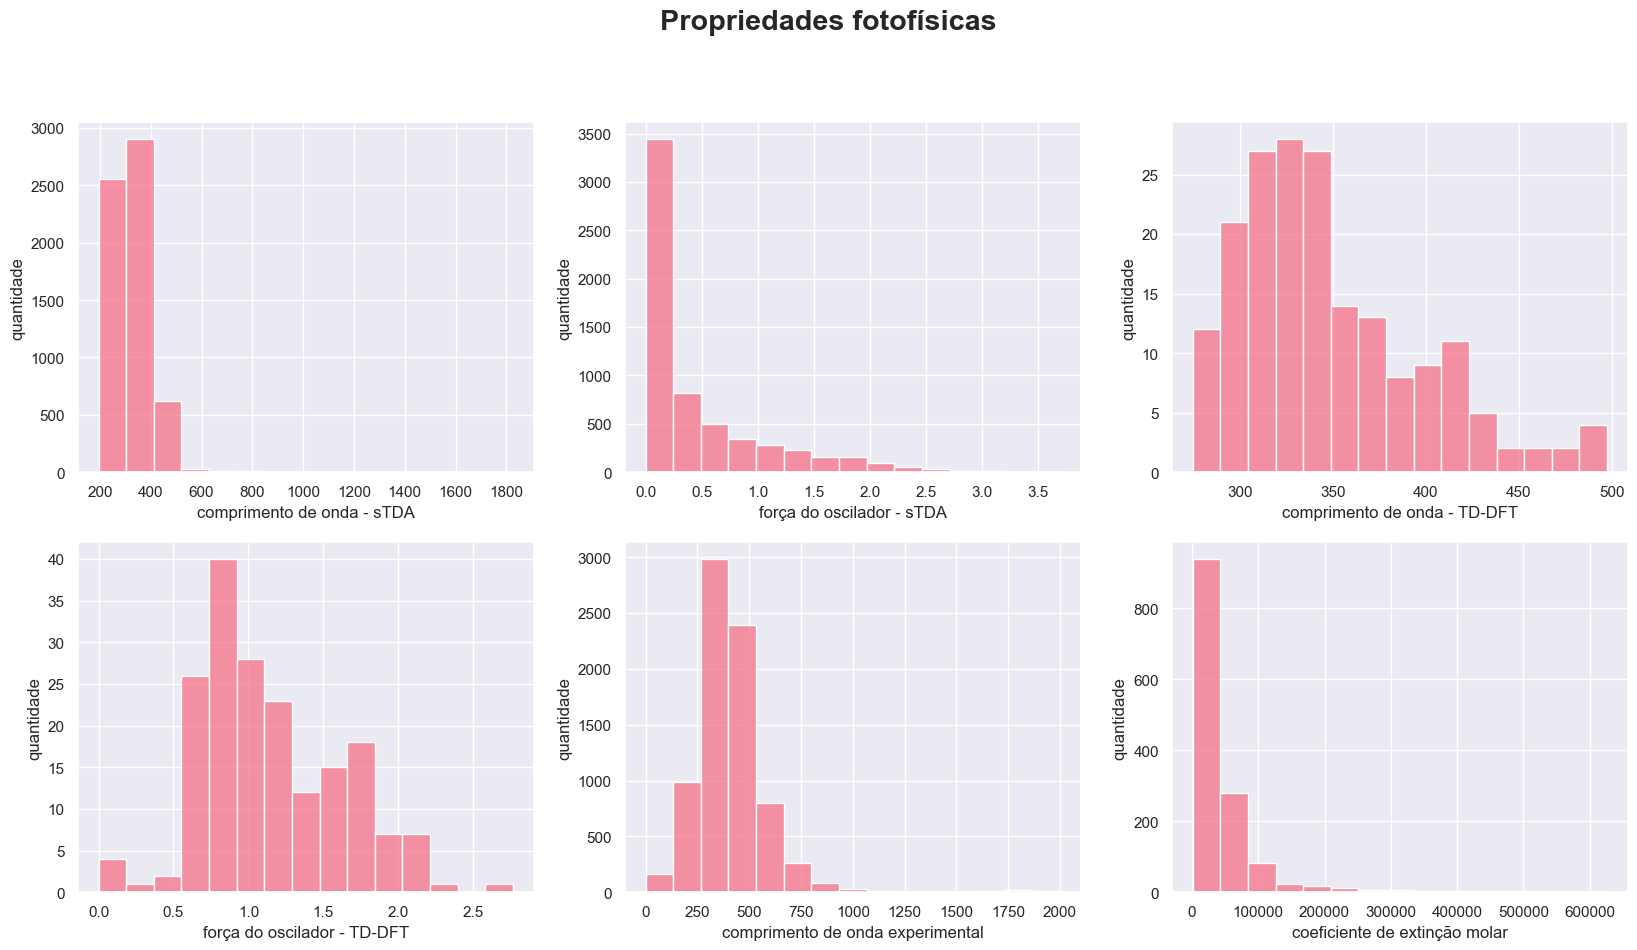

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(20,10))
fig.suptitle(
    'Propriedades fotofísicas',
    verticalalignment='center',
    fontsize='xx-large',
    weight='bold')

# Plot 1:
ax1 = sns.histplot(data=dados, x='lambda_sTDA', ax=ax[0,0], bins=15)
ax1.set(xlabel="comprimento de onda - sTDA", ylabel="quantidade")

# Plot 2:
ax2 = sns.histplot(data=dados, x='f_sTDA', ax=ax[0,1], bins=15)
ax2.set(xlabel="força do oscilador - sTDA", ylabel="quantidade")

# Plot 3:
ax3 = sns.histplot(data=dados, x='lambda_TD_DFT', ax=ax[0,2], bins=15)
ax3.set(xlabel="comprimento de onda - TD-DFT", ylabel="quantidade")

# Plot 4:
ax4 = sns.histplot(data=dados, x='f_TD_DFT', ax=ax[1,0], bins=15)
ax4.set(xlabel="força do oscilador - TD-DFT", ylabel="quantidade")

# Plot 5:
ax5 = sns.histplot(data=dados, x='lambda_exp', ax=ax[1,1], bins=15)
ax5.set(xlabel="comprimento de onda experimental", ylabel="quantidade")

# Plot 6:
ax6 = sns.histplot(data=dados, x='extinction_exp', ax=ax[1,2], bins=15)
ax6.set(xlabel="coeficiente de extinção molar", ylabel="quantidade")


Max peak: 1826.0
Min peak: 194.4


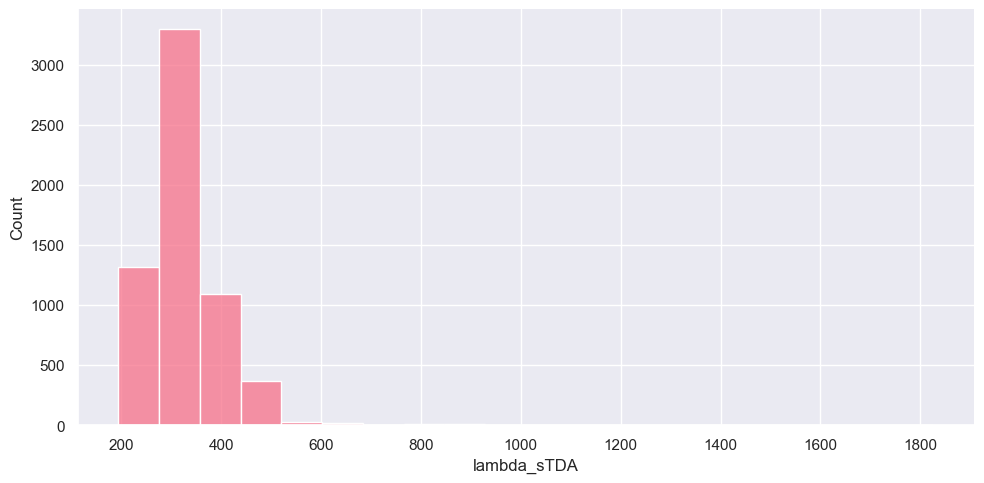

In [12]:
# distribuição dos lambdas obtidos por sTDA 
print('Max peak:', stats.iloc[-1,0])
print('Min peak:', stats.iloc[3,0])
sns.set_theme(style="darkgrid", palette="husl", rc={"figure.figsize":(13, 6)})
sns.displot(dados, x='lambda_sTDA', bins=20, height=5, aspect=2)

[Text(0.5, 0, 'comprimento de onda - sTDA')]

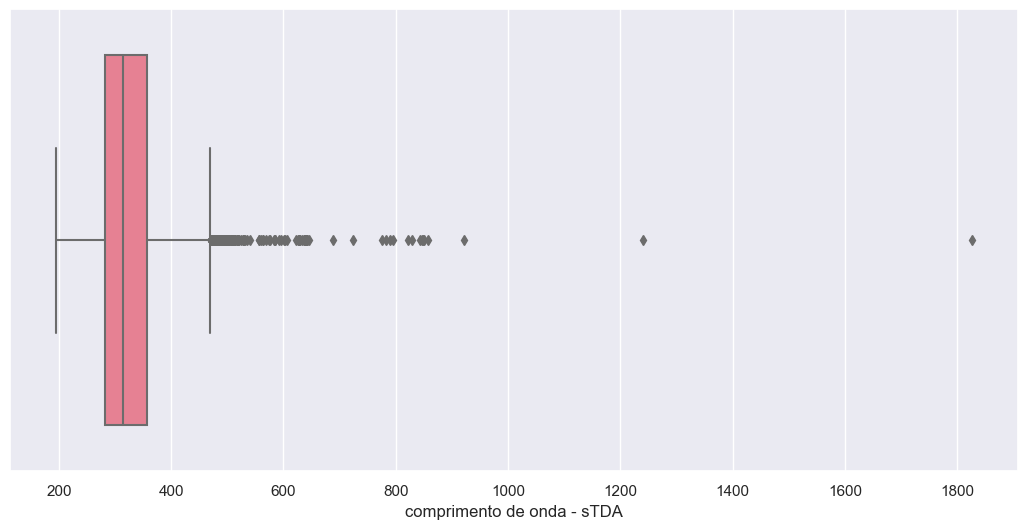

In [12]:
bp_lambda_stda = sns.boxplot(x='lambda_sTDA', data=dados)
bp_lambda_stda.set(xlabel='comprimento de onda - sTDA')

In [14]:
clean_sTDA = dados.loc[dados['lambda_sTDA'] <= 1000]

Max peak: 922.3
Min peak: 194.4


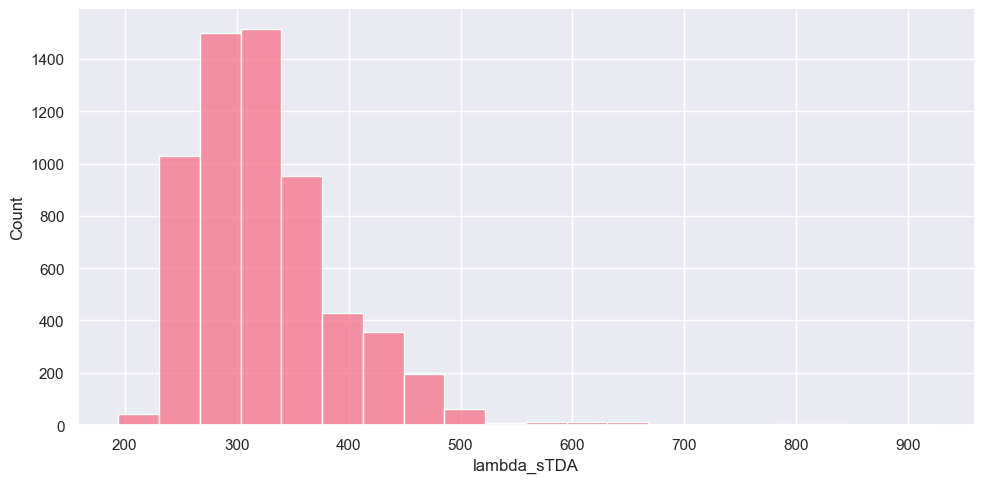

In [15]:
# distribuição dos lambdas obtidos por sTDA até 1000 nm
print('Max peak:', clean_sTDA.describe().iloc[-1,0])
print('Min peak:', clean_sTDA.describe().iloc[3,0])
sns.displot(clean_sTDA, x='lambda_sTDA', bins=20, height=5, aspect=2)

Max peak: 2000.0
Min peak: 0.0


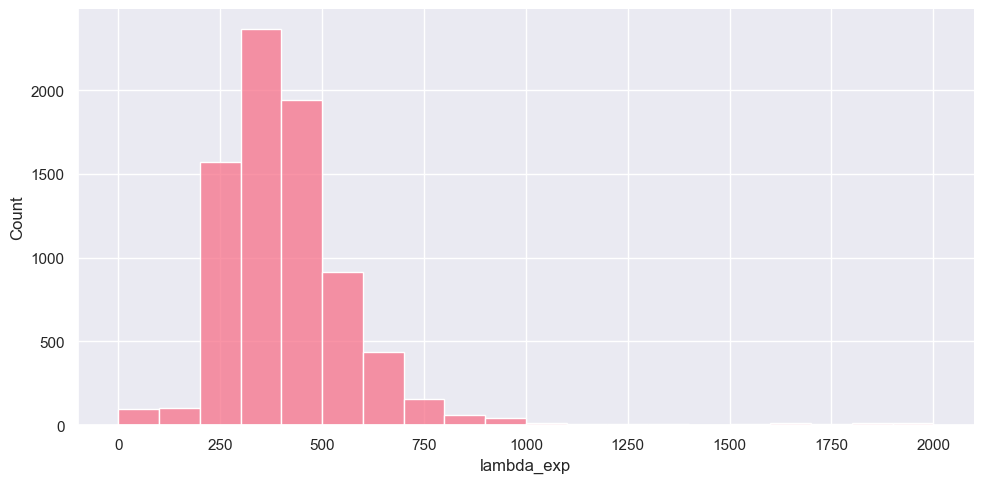

In [16]:
# distribuição dos lambdas obtidos experimentalmente
print('Max peak:', stats.iloc[-1,4])
print('Min peak:', stats.iloc[3,4])
sns.displot(dados, x='lambda_exp', bins=20, height=5, aspect=2)

[Text(0.5, 0, 'comprimento de onda experimental')]

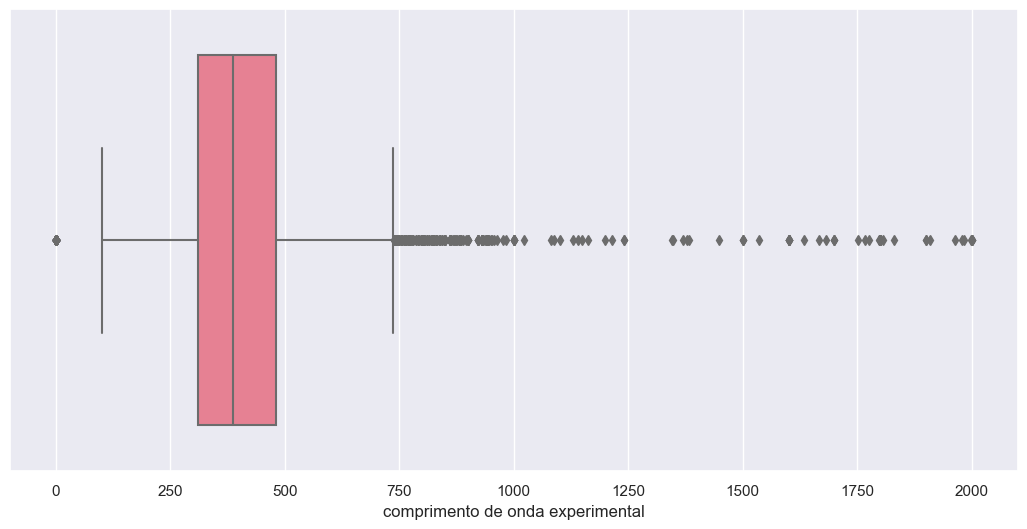

In [13]:
sns.boxplot(x='lambda_exp', data=dados).set(xlabel='comprimento de onda experimental')

In [18]:
clean_exp = dados.query("lambda_exp <= 1000")

Max peak: 1000.0
Min peak: 0.0


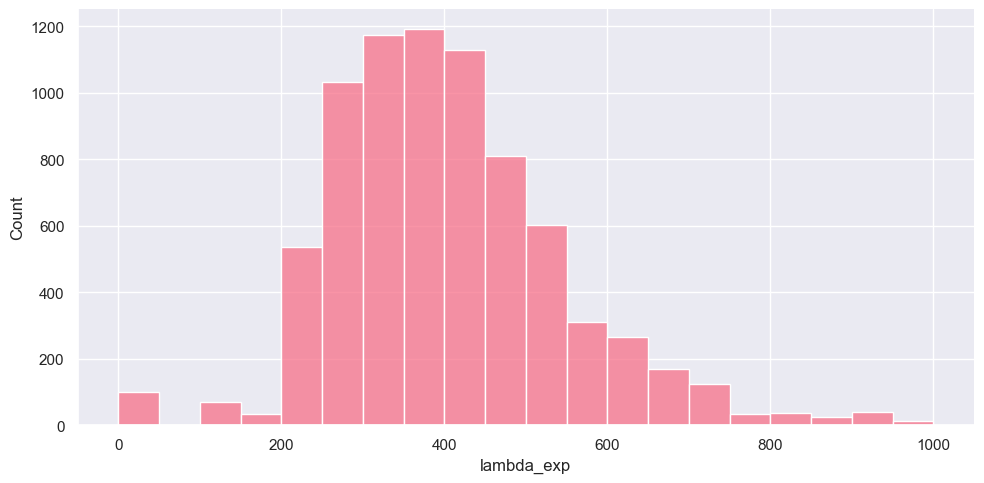

In [19]:
# distribuição dos lambdas obtidos experimentalmente até 1000 nm
print('Max peak:', clean_exp.describe().iloc[-1,4])
print('Min peak:', clean_exp.describe().iloc[3,4])
sns.displot(clean_exp, x='lambda_exp', bins=20, height=5, aspect=2)

In [20]:
# verificando dados onde o lambda experimental é zero
dados.query("lambda_exp == 0")

,SMILES,lambda_sTDA,f_sTDA,lambda_TD_DFT,f_TD_DFT,lambda_exp,extinction_exp,solvent,delta_E
100,[Fe],NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
105,COc1cc2c(cc1O)CC1c3c2c(OC)c(O)cc3CCN1C,280.0,0.356463,NaN,NaN,0.0,NaN,NaN,280.0
107,OCCOCCOCCOCCOCCO,NaN,NaN,NaN,NaN,0.0,NaN,poly(ethylene glycol)s,NaN
108,N[C@H](C(=O)NCCOCCOCCNC(=O)c1ccc(cc1)S(=O)(=O)...,252.1,0.029298,NaN,NaN,0.0,NaN,poly(ethylene glycol)s,252.1
143,CN(c1ccc(cc1)N(C)C)C,289.3,0.082349,NaN,NaN,0.0,NaN,NaN,289.3
...,...,...,...,...,...,...,...,...,...
7990,[O-][Cl](=O)(=O)=O.[O-][Cl](=O)(=O)=O.[Ni+2],NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8071,OC[C@H]1OC(O)[C@@H]([C@H]([C@@H]1O[C@@H]1O[C@H...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8239,[Am+3],NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8248,CC(N)N,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


<Axes: xlabel='lambda_exp', ylabel='lambda_sTDA'>

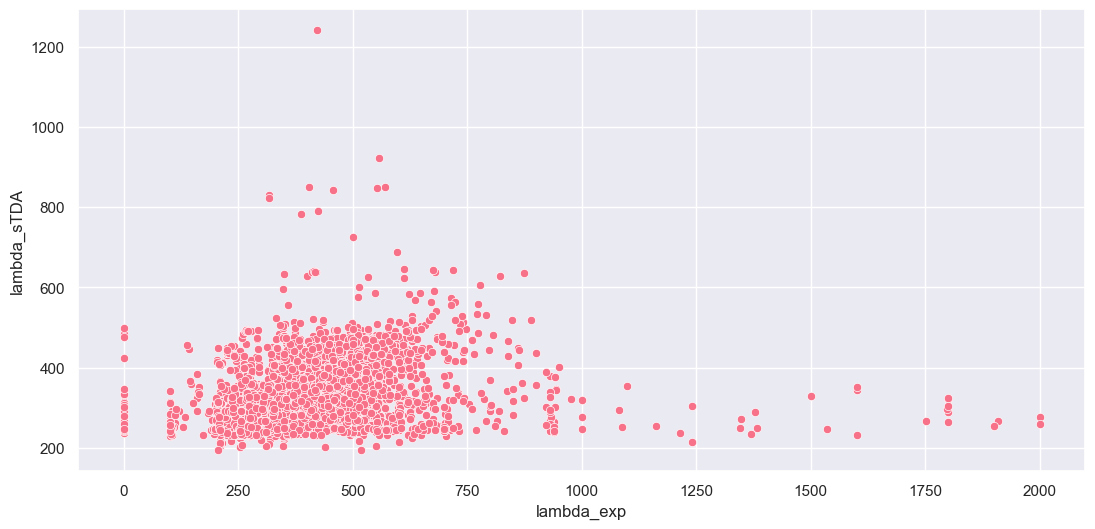

In [21]:
# estabelecendo correlação entre lambda teórico e experimental
# sns.set(rc={"figure.figsize":(15, 8)})
sns.scatterplot(x='lambda_exp', y='lambda_sTDA', data = dados)

Slope of the regression line: 0.140364048713792
Intercept of the regression line: 276.7226846094116
Coefficient of determination: 0.09234401604965926


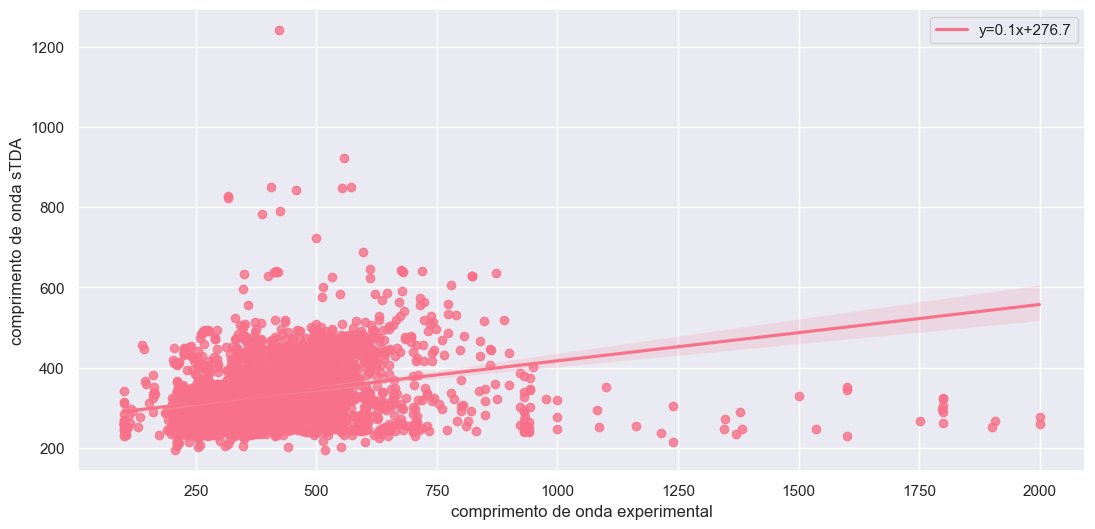

In [14]:
# obtendo regressão linear para (lambda_exp, lambda_sTDA)
from scipy import stats
dados_clean = dados[dados['lambda_exp'] != 0]
dados_clean = dados_clean.dropna(subset=['lambda_exp','lambda_sTDA'])
slope, intercept, r_value, p_value, std_err = stats.linregress(dados_clean['lambda_exp'],dados_clean['lambda_sTDA'])
ax = sns.regplot(x='lambda_exp', y='lambda_sTDA', data = dados_clean, line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set(xlabel='comprimento de onda experimental', ylabel='comprimento de onda sTDA')
ax.legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(dados_clean['lambda_exp'],dados_clean['lambda_sTDA'])
print('Slope of the regression line: %s' %slope)
print('Intercept of the regression line: %s' %intercept)
print('Coefficient of determination: %s' %(r_value ** 2))

Slope of the regression line: 0.6389514560513017
Intercept of the regression line: 105.28137629721743
Coefficient of determination: 0.5326126131798026


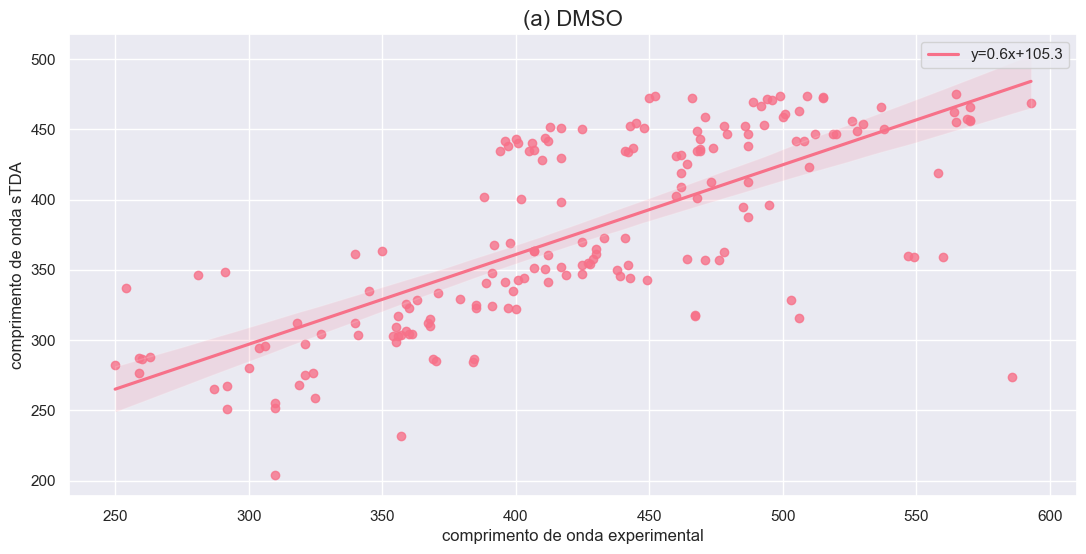

In [17]:
# regressão linear para (lambda_exp em DMSO, lambda_sTDA)
dados_dmso = dados.query("solvent == 'DMSO'")
dados_dmso = dados_dmso.dropna(subset=['lambda_exp','lambda_sTDA'])
slope, intercept, r_value, p_value, std_err = stats.linregress(dados_dmso['lambda_exp'],dados_dmso['lambda_sTDA'])
ax = sns.regplot(x='lambda_exp', y='lambda_sTDA', data = dados_dmso, line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set(xlabel='comprimento de onda experimental',
       ylabel='comprimento de onda sTDA')
plt.title('(a) DMSO', fontsize=16)
ax.legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(dados_dmso['lambda_exp'],dados_dmso['lambda_sTDA'])
print('Slope of the regression line: %s' %slope)
print('Intercept of the regression line: %s' %intercept)
print('Coefficient of determination: %s' %(r_value ** 2))

Slope of the regression line: 0.2778597597975599
Intercept of the regression line: 235.74185050068053
Coefficient of determination: 0.3492782749942599


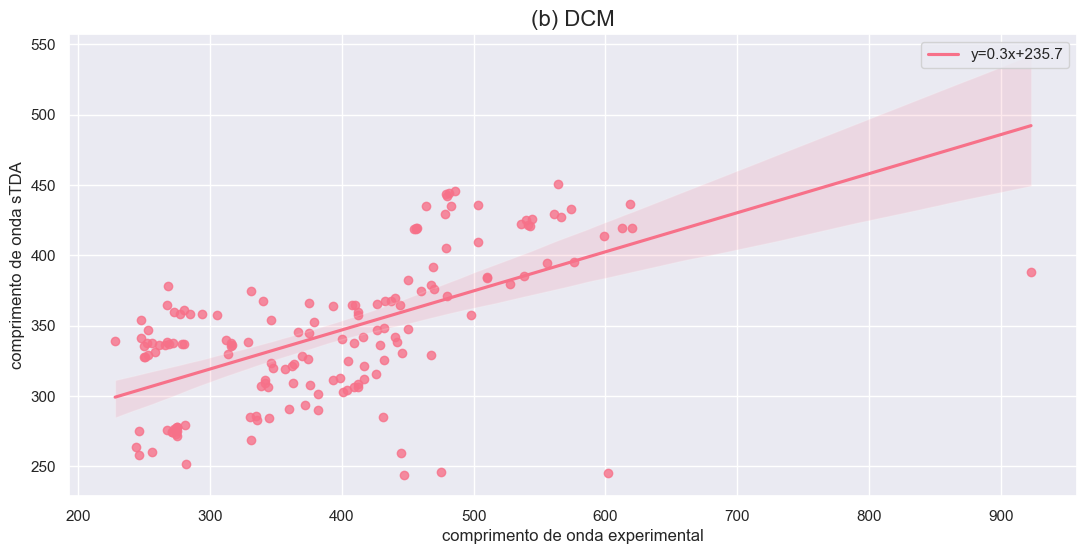

In [18]:
# regressão linear para (lambda_exp em dichloromethane, lambda_sTDA)
dados_dichlo = dados.query("solvent == 'dichloromethane'")
dados_dichlo = dados_dichlo.dropna(subset=['lambda_exp','lambda_sTDA'])
slope, intercept, r_value, p_value, std_err = stats.linregress(dados_dichlo['lambda_exp'],dados_dichlo['lambda_sTDA'])
ax = sns.regplot(x='lambda_exp', y='lambda_sTDA', data = dados_dichlo, line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set(xlabel='comprimento de onda experimental',
       ylabel='comprimento de onda sTDA')
plt.title('(b) DCM', fontsize=16)
ax.legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(dados_dichlo['lambda_exp'],dados_dichlo['lambda_sTDA'])
print('Slope of the regression line: %s' %slope)
print('Intercept of the regression line: %s' %intercept)
print('Coefficient of determination: %s' %(r_value ** 2))

Slope of the regression line: 0.46160845366836095
Intercept of the regression line: 149.06676522106835
Coefficient of determination: 0.2531470202401807


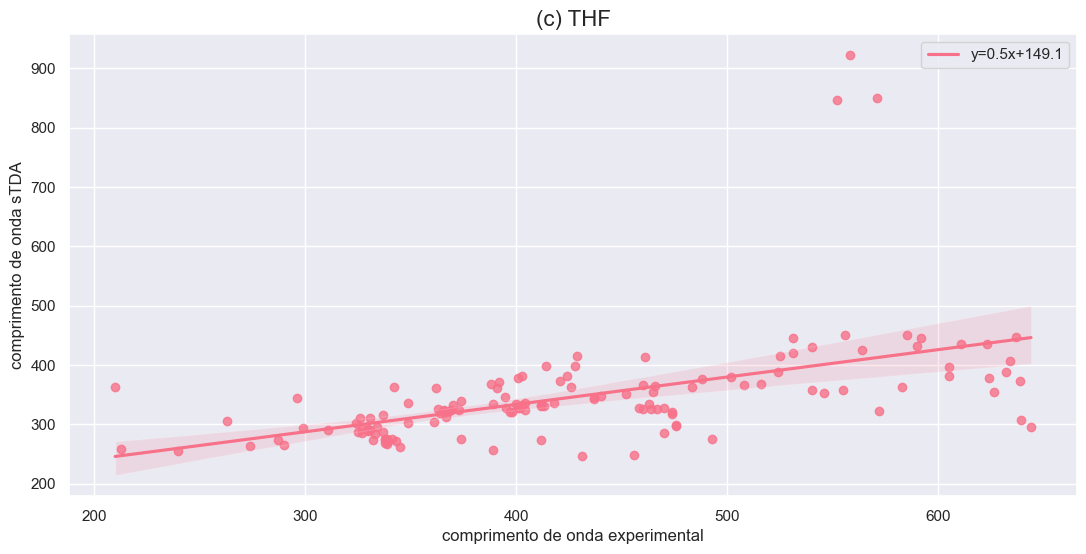

In [19]:
# regressão linear para (lambda_exp em THF, lambda_sTDA)
dados_thf = dados.query("solvent == 'THF'")
dados_thf = dados_thf.dropna(subset=['lambda_exp','lambda_sTDA'])
slope, intercept, r_value, p_value, std_err = stats.linregress(dados_thf['lambda_exp'],dados_thf['lambda_sTDA'])
ax = sns.regplot(x='lambda_exp', y='lambda_sTDA', data = dados_thf, line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set(xlabel='comprimento de onda experimental',
       ylabel='comprimento de onda sTDA')
plt.title('(c) THF', fontsize=16)
ax.legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(dados_thf['lambda_exp'],dados_thf['lambda_sTDA'])
print('Slope of the regression line: %s' %slope)
print('Intercept of the regression line: %s' %intercept)
print('Coefficient of determination: %s' %(r_value ** 2))

Slope of the regression line: 0.3958954677519974
Intercept of the regression line: 172.30344674348373
Coefficient of determination: 0.5601892794264809


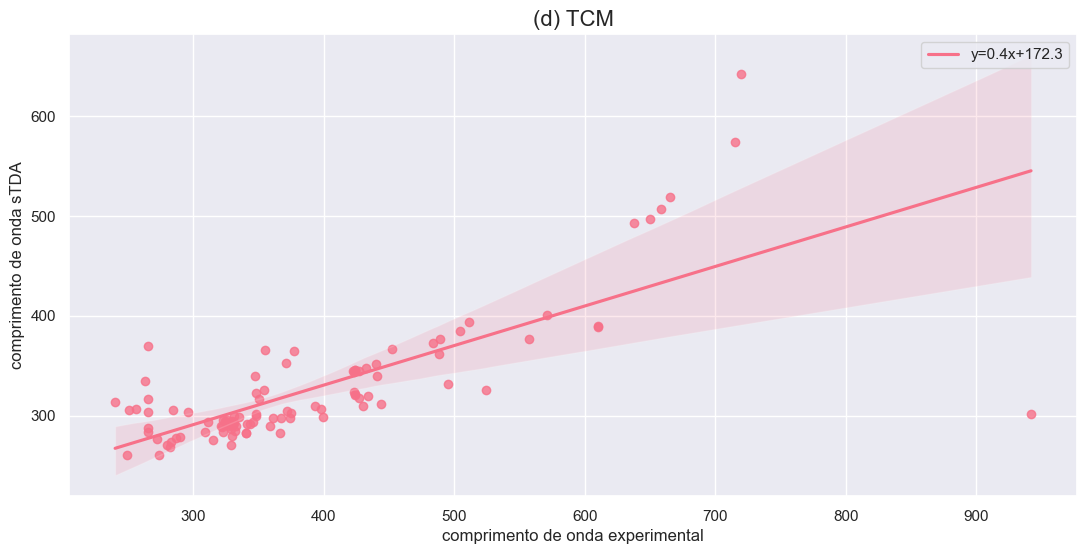

In [20]:
# regressão linear para (lambda_exp em clorofórmio, lambda_sTDA)
dados_chlo = dados.query("solvent == 'chloroform'")
dados_chlo = dados_chlo.dropna(subset=['lambda_exp','lambda_sTDA'])
slope, intercept, r_value, p_value, std_err = stats.linregress(dados_chlo['lambda_exp'],dados_chlo['lambda_sTDA'])
ax = sns.regplot(x='lambda_exp', y='lambda_sTDA', data = dados_chlo, line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set(xlabel='comprimento de onda experimental',
       ylabel='comprimento de onda sTDA')
plt.title('(d) TCM', fontsize=16)
ax.legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(dados_chlo['lambda_exp'],dados_chlo['lambda_sTDA'])
print('Slope of the regression line: %s' %slope)
print('Intercept of the regression line: %s' %intercept)
print('Coefficient of determination: %s' %(r_value ** 2))

Slope of the regression line: 0.23086257460466633
Intercept of the regression line: 253.52912510662253
Coefficient of determination: 0.2309246926199228


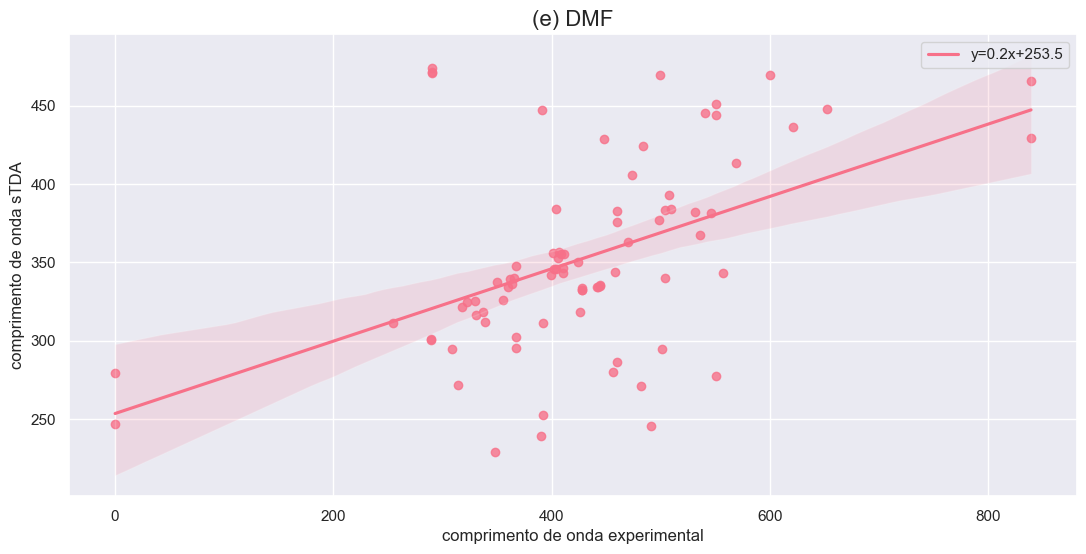

In [21]:
# regressão linear para (lambda_exp em DMF, lambda_sTDA)
dados_dmf = dados.query("solvent == 'DMF'")
dados_dmf = dados_dmf.dropna(subset=['lambda_exp','lambda_sTDA'])
slope, intercept, r_value, p_value, std_err = stats.linregress(dados_dmf['lambda_exp'],dados_dmf['lambda_sTDA'])
ax = sns.regplot(x='lambda_exp', y='lambda_sTDA', data = dados_dmf, line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set(xlabel='comprimento de onda experimental',
       ylabel='comprimento de onda sTDA')
plt.title('(e) DMF', fontsize=16)
ax.legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(dados_dmf['lambda_exp'],dados_dmf['lambda_sTDA'])
print('Slope of the regression line: %s' %slope)
print('Intercept of the regression line: %s' %intercept)
print('Coefficient of determination: %s' %(r_value ** 2))

In [30]:
# obtendo a frequência dos solventes
solv_freq = dados['solvent'].value_counts()
solv_freq

DMSO               208
dichloromethane    207
THF                167
chloroform         129
DMF                119
                  ... 
DEE                  1
MOPS                 1
Hex                  1
Ethyl acetate        1
MCH                  1
Name: solvent, Length: 101, dtype: int64

In [29]:
# obtendo os principais solventes utilizados
solv_freq[solv_freq > 100]

DMSO               208
dichloromethane    207
THF                167
chloroform         129
DMF                119
Name: solvent, dtype: int64

C:\Users\ganna\AppData\Local\Temp\ipykernel_15288\2412924666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_solv['solvent'] = top_solv['solvent'].replace({'chloroform': 'TCM', 'dichloromethane': 'DCM'})


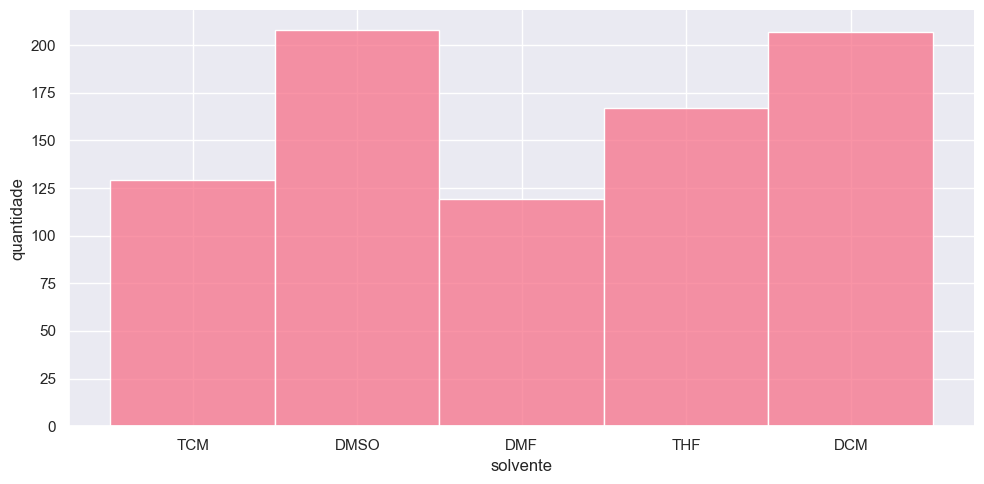

In [34]:
# distribuição dos principais solventes
top_solv = dados[dados['solvent'].isin(solv_freq[solv_freq > 100].index)]
top_solv['solvent'] = top_solv['solvent'].replace({'chloroform': 'TCM', 'dichloromethane': 'DCM'})
sns.displot(top_solv, x='solvent', bins=20, height=5, aspect=2).set(ylabel='quantidade', xlabel='solvente')

In [31]:
import json
from os import listdir
from os.path import isfile, join

class_list = []

path = './JSON/'

jsonfiles = [f for f in listdir(path) if isfile(join(path, f)) and f.endswith('.json')]

for fname in jsonfiles:
    with open(join(path,fname)) as fi:
        jdata = json.load(fi)
        if 'FILTERED' in jdata:
            classe = jdata['FILTERED'][0]['STATUS']
            class_list.append(classe)

In [32]:
from collections import Counter
class_dict = dict(Counter(class_list))

In [33]:
class_dict

{'NonAlkyl': 5824, 'TrimmedAlkyl': 919}

<Axes: >

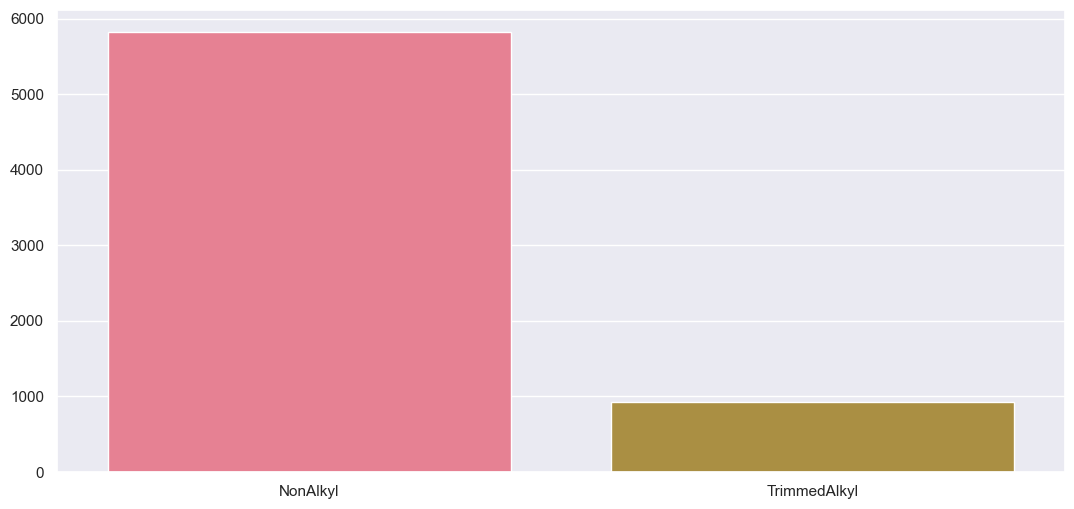

In [34]:
# distribuição de classes
sns.barplot(x=list(class_dict.keys()), y=list(class_dict.values()))